# **Trabajo Práctico: Análisis de Datos de la línea 144**
## Introducción
La linea 144 brinda atención, contención y asesoramiento a personas en situación de violencia de género. Esta línea fue creada en 2013 para cumplir con la ley Nº 26.485 (más información en: https://www.argentina.gob.ar/capital-humano/generos/linea-144).

Se dispone de archivos de datos sobre las llamadas recibidas por este número. Cada registro representa una llamada e incluye información como la fecha, la provincia, el género de la persona que llama, su edad, su nacionalidad, entre otros datos. Los mismos pueden consultarse y descargarse en el sitio https://www.datos.gob.ar/dataset/generos-base-datos-linea-144. En el mismo sitio pueden consultarse los campos con sus tipos de datos y descripción.

En este Proyecto Final se trabajaran con los datos correspondientes a los años 2020 al 2022 (no incluiremos los datos del año 2023 por no estar completos).




## Objetivo del Proyecto final
El objetivo primordial de este Proyecto Final es que el alumno demuestre un empleo adecuado de los elementos y construcciones del lenguaje de programación. Para ello se trabajará con los datos disponibles resolviendo ciertas consignas que se le presentaran en 3 etapas.

A lo largo de tres semanas, trabajarán en la lectura, manipulación y análisis de estos datos, así como en la creación de clases y métodos para comparar y visualizar los resultados.



## Consignas Semana 1:##






1. Descargar los archivos  `datosVG2020.csv`, `datosVG2021.csv` y `datosVG2022.csv` ejectundo el código que se le propone a continuación

In [ ]:
#No modificar este código que le permitirá bajar los archivos que necesita para trabajar.

import requests
datosVG2020 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv"
datosVG2021 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv"
datosVG2022 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8-sig") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8-sig"))

    print("¡Archivo descargado con éxito!")

descargarCSV(datosVG2020, "datosVG2020.csv")
descargarCSV(datosVG2021, "datosVG2021.csv")
descargarCSV(datosVG2022, "datosVG2022.csv")


Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


2. Escribir una función `fusionarArchivosCSV` que tomando una lista de nombres de archivos (con el formato publicado de la linea 144), genere un nuevo archivo con el mismo formato con los datos de los archivos anteriores exceptuando aquellos registros con `fecha` y/o `prov_residencia_persona_en_situacion_violencia` nulos.


3. Invocar a la función `fusionarArchivosCSV` con un lista con los nombres `datosVG2020.csv`, `datosVG2021.csv` y `datosVG2022.csv` y generar un nuevo archivo llamado `datos_filtrados.csv`

In [ ]:
import csv

#definimos una funcion que fusiona muchos archivosCSV(iguales) en unico archivo CSV
def fusionarArchivosCSV(lista_archivos_entrada: list[str],archivo_salida: str) -> None:
  """
  fusionarArchivosCSV recibe una lista con los nombres de los archivos a fusionar archivo (con el formato
  publicado de la linea 144) y genera un nuevo archivo en memoria con todos los contenidos de los archivos
  recien mencionados. No devuelve nada.
  """

  # Iteramos la lista de archivosCsv, y la leemos con el csv.reader
  for archivo in lista_archivos_entrada:
     with open(archivo, 'r') as datos:
      lector_csv = csv.reader(datos)
      next(lector_csv)#salto la primer fila que contiene los nombres de las columnas

      # Iteramos las filas de los archivosCSV, creando variables para la columna 1 (fecha) y la columna 2 (prov_residencia_persona_en_situacion_violencia)
      for fila in lector_csv:

         fecha = fila[0]
         prov_residencia_persona_en_situacion_violencia = fila[1]

         # Evaluamos si la fecha o el nombre de la provincia está vacía después de eliminar los espacios en blanco, si es así saltamos toda la fila.
         if not fecha.strip() or not prov_residencia_persona_en_situacion_violencia.strip():
            continue

         #Normalizacion nombre de provincias
         nombre_de_provincia_normalizado = normalizarNombreProvincias(prov_residencia_persona_en_situacion_violencia)


         fila[1] = nombre_de_provincia_normalizado

         # Iteramos por el largo de la fila, eliminamos espacios en blanco iniciales y finales del elemento. Y si esta vacio el elemento de la columna, sustituimos por un guion.
         for i in range(len(fila)):
            if not fila[i].strip():
                fila[i] = '-'

            # Abrimos un archivos CSV en modo agregar(append) y vamos escribiendo los datos de los archivos leidos anteriormente.
         with open(datos_filtrados, 'a', newline='') as archivo_csv:
             escritor_csv = csv.writer(archivo_csv)
             escritor_csv.writerow(fila)

#Normalizamos las provincias Cordoba y Santiago del estero.
def normalizarNombreProvincias(nombProvincia: str) -> str:
    if nombProvincia == "Santiago Del Estero":
      return "Santiago del Estero"
    elif nombProvincia == "Córdoba":
      return "Cordoba"
    else:
      return nombProvincia

# creamos una lista con los 3 archivos csv que queremos fusionar
lista_archivos_entrada = ["datosVG2020.csv", "datosVG2021.csv", "datosVG2022.csv"]
#creamos lista que obtendremos como resultado
datos_filtrados = "datos_filtrados.csv"

#invoca la función con la lista a fusionar y la lista resultante
fusionarArchivosCSV(lista_archivos_entrada, datos_filtrados)






4. Escribir una función *obtenerAnios* que reciba el nombre de un archivo (con el formato publicado de la linea 144) y devuelva la lista de años que aparecen en el archivo.


In [ ]:
import csv

#Definimos una función que recibe un archivo formato str y devuelve lista de enteros
def obtenerAnios(archivo: str) -> list[int]:
  """
  obtenerAnios es una funcion que recibe recibe el nombre de un archivo (con el formato
  publicado de la linea 144) y devuelve la lista de años que aparecen en el archivo
  """

  lista_anios = []

  #leemos el archivo csv
  with open(archivo, 'r') as datos:
    lector_csv = csv.reader(datos)#creamos variable con la lectura del csv.

  # iteramos cada fila del archivo
    for fila in lector_csv:
        fecha = fila[0] #Inicializamos variable fecha con el primer elemento de la columna
        anio_fila = fecha[:4] #tomamos el anio de la fecha (primeros 4 digitos)

        if anio_fila not in lista_anios: #si el anio no esta en la lista, lo agregamos
          lista_anios.append(anio_fila)

  return lista_anios #devolvemos la lista con los anios.


#creamos variables con archivoCSV y lista de anios
datos = "datos_filtrados.csv"
lista_anios = []

#invocar la funcion obtener años
lista_anios = obtenerAnios(datos)

#mostramos los anios de la lista
print(lista_anios)





['2020', '2021', '2022']


5. Escribir una función *crearEstadisticasAnualDesdeArchivo* que reciba el nombre de un archivo (con el formato publicado de la linea 144) y un año y devuelva:
- un diccionario donde las claves sean las provincias argentinas desde donde se realizaron llamadas ese año a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año, y
- el promedio de edades de las personas que llamaron a esa línea durante todo el año (como valor entero)




In [ ]:
import csv

#Definimos funcion que recibe archivoCSv (str) y un anio, devolvemos una tupla que contiene diccionario con cant.llamadasXprovincia y anio en cuestion. None si hay errores
def crearEstadisticasAnualDesdeArchivo(archivo: str, anio:int) -> tuple[dict[str,int],int] | None:
  """
  crearEstadisticasAnualDesdeArchivo recibe el nombre de un archivo (con el formato publicado de la linea 144)
  y un año y devuelve:
    - None si no hay datos de dicho año en el archivo
    - un diccionario contar_provincias: dict[str,int]
        donde las claves son las provincias argentinas desde donde se realizaron llamadas ese año
        a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año,
      y promedio_edades: int
        que es el promedio de edades de las personas que llamaron a esa línea durante todo el año
  """

  dic = {}
  llamadasXProv_yPromedio = (dic,int) #se crea la tupla que contiene un dic y un entero

  # leemos el archivo CSV
  with open(archivo, 'r') as datos:
    lector_csv = csv.reader(datos)

    cant_llamadas = 0
    suma = 0

    # iteramos el archivo csv,
    for fila in lector_csv:
        fecha = fila[0]
        anio_fila = int(fecha[:4]) #Convertimos a entero los primeros 4 numeros de la variable fecha

        # comparamos el anio_fila con el anio que se ingreso a la funcion, y si coinciden, obtenemos el nombre de la provincia (de la segunda columna de la fila)
        if anio_fila == anio:
          provincia = fila[1]

          # Chequeamos que la columna 4 (edad) no contenga un guion.
          if fila[3] != "-":
            suma += int(fila[3]) #convertimos el valor a un entero, y lo sumamos la edad a la variable suma.
            cant_llamadas += 1

          # Chequeamos si la provincia ya existe en el diccionario, si es asi le sumamos uno a la cant.de llamadasXprov., sino incializamos esa provincia con 1.
          if provincia in dic:
            dic[provincia] += 1
          else:
            dic[provincia] = 1

    #Calcula el promedio entre la suma de las edades de los llamantes y la cantidad de llamadas devolviendo un entero
    promedio = int(suma / cant_llamadas)

    # agregamos el dic y el promedio a la tupla
    llamadasXProv_yPromedio = (dic,promedio)

  # devolvemos la tupla
  return llamadasXProv_yPromedio


#Se asigna el valor de los datos_filtrados a la variable datos
datos = "datos_filtrados.csv"

#Se crea una tupla vacía
estadistica_anual_llamadas144 = ()

#Se pide al usuario que ingrese el año que desea ver
anio = int(input("Ingrese el año que desea chequear \n 2020 \n 2021 \n 2022 \n"))


#Guardamos en la tupla, la tupla que resulta de llamar a la funcion con archivo csv y el anio a evaluar en cuestion
estadistica_anual_llamadas144 = crearEstadisticasAnualDesdeArchivo(datos, anio)

# Desempaquetamos la tupla
dic, promedio = estadistica_anual_llamadas144

#imprimimos el diccionario y el promedio del anio seleccionado.
print("Llamadas por provincia:\n ", dic)
print(f"Promedio de llamadas en el año {anio}:\n", promedio)

Ingrese el año que desea chequear 
 2020 
 2021 
 2022 
2022
Llamadas por provincia:
  {'Buenos Aires': 13075, 'Ciudad Autónoma de Buenos Aires': 4931, 'Santiago del Estero': 143, 'Santa Fe': 1025, 'Corrientes': 177, 'Tucumán': 925, 'La Rioja': 101, 'Río Negro': 118, 'Neuquén': 165, 'Jujuy': 317, 'San Luis': 298, 'Cordoba': 660, 'Chaco': 254, 'San Juan': 187, 'Mendoza': 767, 'Misiones': 202, 'Chubut': 79, 'Salta': 312, 'Catamarca': 107, 'Tierra del Fuego, Antártida e Islas del Atlántico Sur': 28, 'Entre Ríos': 189, 'La Pampa': 30, 'Formosa': 100, 'Santa Cruz': 46}
Promedio de llamadas en el año 2022:
 35


## Consignas Semana 2:##

**6**. Definir una clase `EstadisticasAnual`

  con los siguientes atributos:
- `anio`: año asociado a la clase,
- `cant_llamadas_por_provincia`: diccionario donde las claves son las provincias argentinas desde donde se realizaron llamadas el año `anio` a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año
- `promedio_edades`: que es el promedio de edades de las personas que llamaron a esa linea durante el año `anio` (como valor entero)

  y los siguientes métodos:
- `__init__`
- `get_anio`
- `get_cant_llamadas_por_provincia`
- `get_promedio_edad_llamantes`
- `__str__`

Estadisticas del año 2020:
 Cantidad de llamadas por provincia: {'Tucumán': 948, 'Buenos Aires': 16809, 'Santiago del Estero': 195, 'Santa Fe': 1257, 'San Juan': 212, 'Catamarca': 73, 'Neuquén': 182, 'Mendoza': 1180, 'Cordoba': 826, 'Río Negro': 164, 'Ciudad Autónoma de Buenos Aires': 5267, 'Salta': 473, 'Entre Ríos': 209, 'Jujuy': 443, 'Chaco': 238, 'Chubut': 96, 'San Luis': 152, 'La Pampa': 25, 'Misiones': 143, 'Formosa': 117, 'Tierra del Fuego, Antártida e Islas del Atlántico Sur': 28, 'Corrientes': 136, 'Santa Cruz': 40, 'La Rioja': 65}
 Promedio de edades de los llamantes: 36
Estadisticas del año 2021:
 Cantidad de llamadas por provincia: {'Buenos Aires': 13695, 'Ciudad Autónoma de Buenos Aires': 5272, 'La Rioja': 103, 'Santa Fe': 981, 'Cordoba': 700, 'Tucumán': 955, 'Mendoza': 844, 'San Luis': 153, 'Chubut': 75, 'Chaco': 190, 'Neuquén': 175, 'Santiago del Estero': 135, 'Entre Ríos': 135, 'Jujuy': 342, 'Salta': 326, 'Misiones': 123, 'Río Negro': 123, 'San Juan': 179, 'Formosa': 88

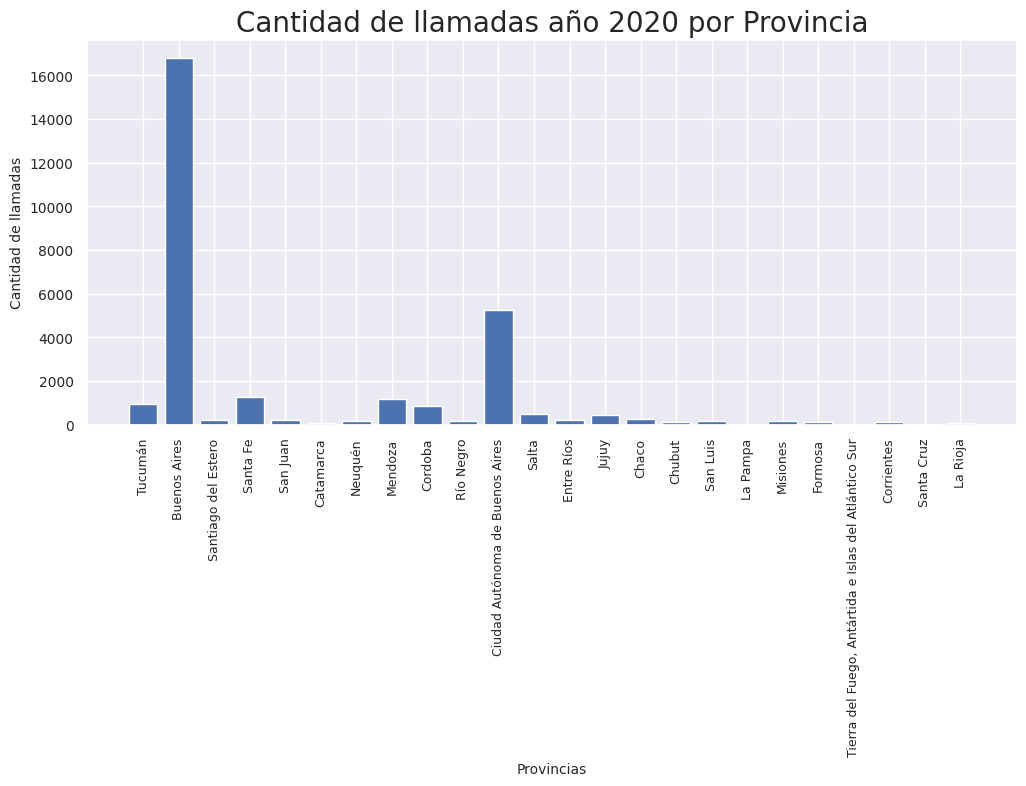

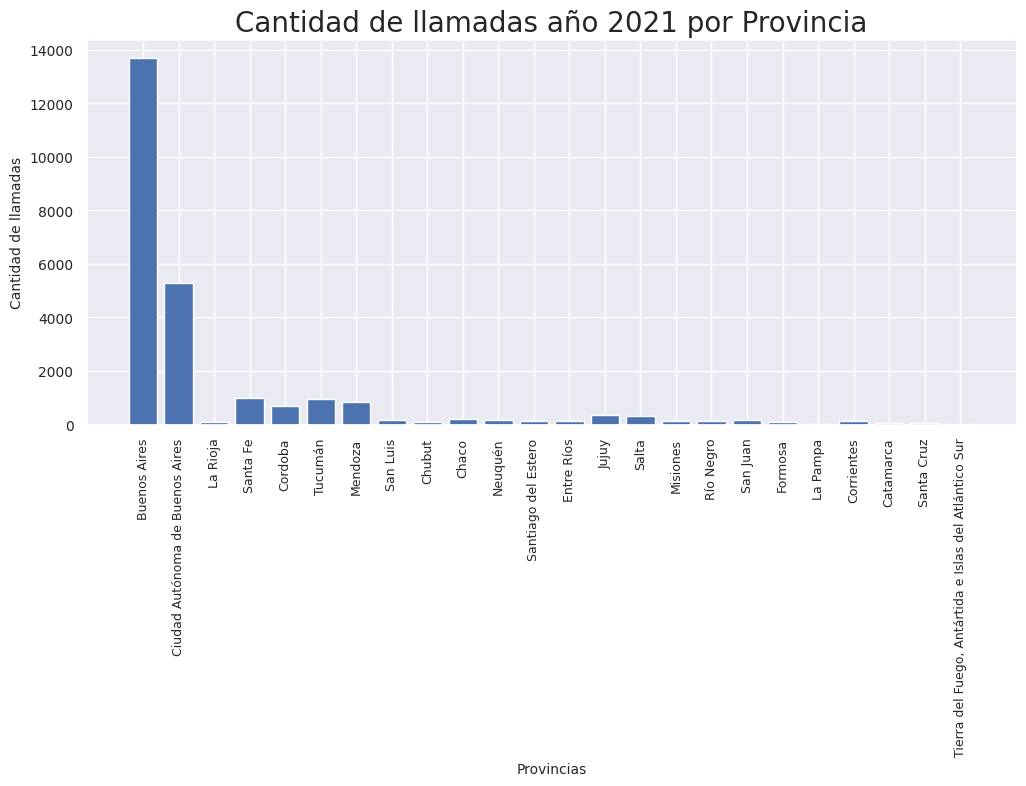

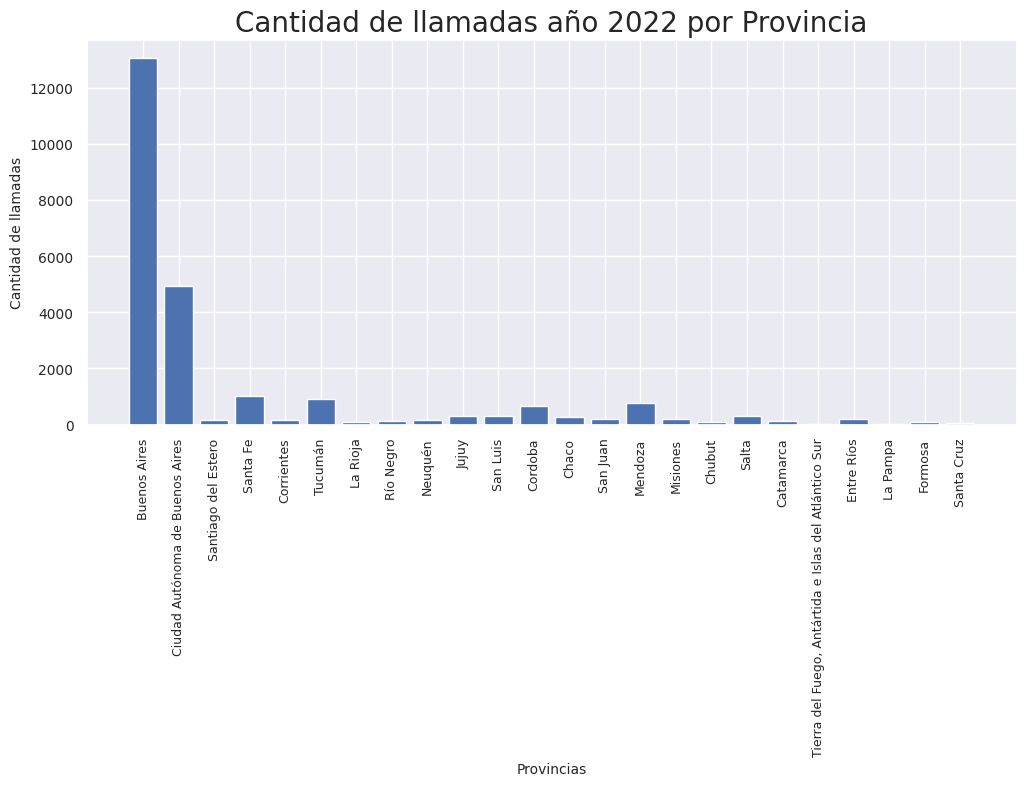

In [ ]:
#importacion librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

"""
La clase EstadisticasAnual se utilizará para mantener información sobre
estadísticas de Situaciones de Violencia en Argentina en un año en particular
"""
# Creamos una clase que contiene un anio, un dic con nombre de prov. y cant_llamadas, y un entero con promedio_edad de los llamantes
class EstadisticasAnual:
  def __init__(self, anio: int, cant_llamadas_por_provincia:dict[str,int], promedio_edad_llamantes: int):
    self._anio=anio
    self._cant_llamadas_por_provincia=cant_llamadas_por_provincia
    self._promedio_edad_llamantes=promedio_edad_llamantes

  # metodo para obtener el anio
  def getAnio(self) -> int:
    return self._anio

  #metodo para obtener el diccionario
  def getCantLlamadasPorProvincia(self) -> dict[str,int]:
     return self._cant_llamadas_por_provincia

  #metodo para obtener el promedio de la edad de los llamantes
  def getPromedioEdadLlamantes(self) -> int:
    return self._promedio_edad_llamantes

  #metodo que imprime los datos por pantalla
  def __str__(self)->str:
    return f"Estadisticas del año {self._anio}:\n Cantidad de llamadas por provincia: {self._cant_llamadas_por_provincia}\n Promedio de edades de los llamantes: {self._promedio_edad_llamantes}"

  #Metodo para graficarLLamadasPorProvincia
  def graficarLLamadasPorProvincia(self, titulo, etiqueta_x, etiqueta_y,datos_x,datos_y):
    plt.figure(figsize = (12,5)) #dimensiones de la figura
    plt.xticks(rotation = 90,fontsize=9); #rotacion y tamaño de las etiquetas del eje x
    plt.yticks(fontsize=10); #tamaño de las etiquetas del eje y
    plt.xlabel(etiqueta_x,fontsize=10) #nombre del eje x
    plt.ylabel(etiqueta_y,fontsize=10) #nombre del eje y
    plt.title(titulo,fontsize=20) #titulo del gráfico y tamaño de la fuente
    plt.bar(datos_x, datos_y) #pasamos los valores en ejes x e y, para graficar


# creamos una funcion que recibiendo un archivo CSV, crea una lista con objetos de la clase EstadisticaAnual !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def crearObjetosEstadisticasAnual(archivoCSV: str) -> list[EstadisticasAnual] | None:

    # Creamos lista vacia
    lista_estadisticas_anuales=[]
    #creamos una lista llamando a la funcion obtener anios
    lista_de_anios = obtenerAnios(archivoCSV)

    # Iteramos sobre la lista de anios
    for anual in lista_de_anios:
      anual = int(anual)#lo convertimos a entero
      # Creamos la tupla en la cual metemos el diccionario y el entero de la funcion crearEstadisticasAnualDesdeArchivo.
      estadistica_anual_llamadas144 = ()
      estadistica_anual_llamadas144 = crearEstadisticasAnualDesdeArchivo(archivoCSV,anual)

      # Desempaquetamos la tupla
      cant_llamadas_por_provincia, promedio_edad_llamantes = estadistica_anual_llamadas144

      # Inicializamos el objeto de la clase EstadisticasAnual con los datos correspondientes, y agregamos a la lista.
      estadisticaAnual = EstadisticasAnual(anual, cant_llamadas_por_provincia, promedio_edad_llamantes)
      lista_estadisticas_anuales.append(estadisticaAnual)

    #Devolvemos la lista de objetos EstadisticasAnual
    return lista_estadisticas_anuales

#creamos archivosCSV
datos = 'datos_filtrados.csv'

#inicializamos una lista de objetos EstadisticaAnual llamando a la funcion crearObjetosEstadisticasAnual
lista_estadisticas_anuales = crearObjetosEstadisticasAnual(datos)

# iteramos sobre los objetos creados. Imprimemos sus datos, y generamos un grafico por cada anio con el metodo graficarLLamadasPorProvincia()
for estadisticaAnual in lista_estadisticas_anuales:
  print(estadisticaAnual) #Imprimimos el objeto con los datos que se incluyen en el metodo str()
  anio = estadisticaAnual.getAnio()
  dic = estadisticaAnual.getCantLlamadasPorProvincia()
  estadisticaAnual.graficarLLamadasPorProvincia(f"Cantidad de llamadas año {anio} por Provincia", "Provincias", "Cantidad de llamadas", dic.keys(),dic.values())



7. Escribir una función crearObjetosEstadisticasAnual que tome el nombre de un archivo y devuelva una lista de objetos de la clase EstadisticasAnual, donde cada objeto contiene información de cada año del cual se disponen datos en el archivo. Debe invocar a las funciones `obtenerAnios` y `crearEstadisticasAnualDesdeArchivo`

8. Invocar a la función anterior con el nombre de archivo  `datos_filtrados.csv`.

## Consignas Semana 3:##

9. Agregar el método `graficarLLamadasPorProvincia` a la clase `EstadisticasAnual` que muestre en un gráfico de barras la cantidad de llamadas que se hicieron en el año en cuestión desde cada provincia.

10. Realizar las gráficas para los años que se disponen de datos invocando a este método a partir de los objetos creados en el punto 8.

11. Definir una nueva clase `EstadisticasViolencia`

  con el atributo:
- `estadisticasAnuales`: lista de objetos de la clase `EstadisticasAnual`
  
  y los siguientes métodos:
- `__init__`
- `compararPromediosEdadesPorAnio`
- `minimaEdadPromedio`
- `compararGráficamenteDosAnios`
- `__str__`

Promedio de edad de las llamadas del anio 2020: 36

Promedio de edad de las llamadas del anio 2021: 35

Promedio de edad de las llamadas del anio 2022: 35

El anio con el promedio de edad de llamadas más bajo es 2021 con 35 años
Ingrese primer año que desea comparar 
 2020 
 2021 
 2022 
2020
Ingrese segundo año que desea comparar 
 2020 
 2021 
 2022 
2022
Estadisticas del año 2020:
 Cantidad de llamadas por provincia: {'Tucumán': 948, 'Buenos Aires': 16809, 'Santiago del Estero': 195, 'Santa Fe': 1257, 'San Juan': 212, 'Catamarca': 73, 'Neuquén': 182, 'Mendoza': 1180, 'Cordoba': 826, 'Río Negro': 164, 'Ciudad Autónoma de Buenos Aires': 5267, 'Salta': 473, 'Entre Ríos': 209, 'Jujuy': 443, 'Chaco': 238, 'Chubut': 96, 'San Luis': 152, 'La Pampa': 25, 'Misiones': 143, 'Formosa': 117, 'Tierra del Fuego, Antártida e Islas del Atlántico Sur': 28, 'Corrientes': 136, 'Santa Cruz': 40, 'La Rioja': 65}
 Promedio de edades de los llamantes: 36
Estadisticas del año 2021:
 Cantidad de llamadas por

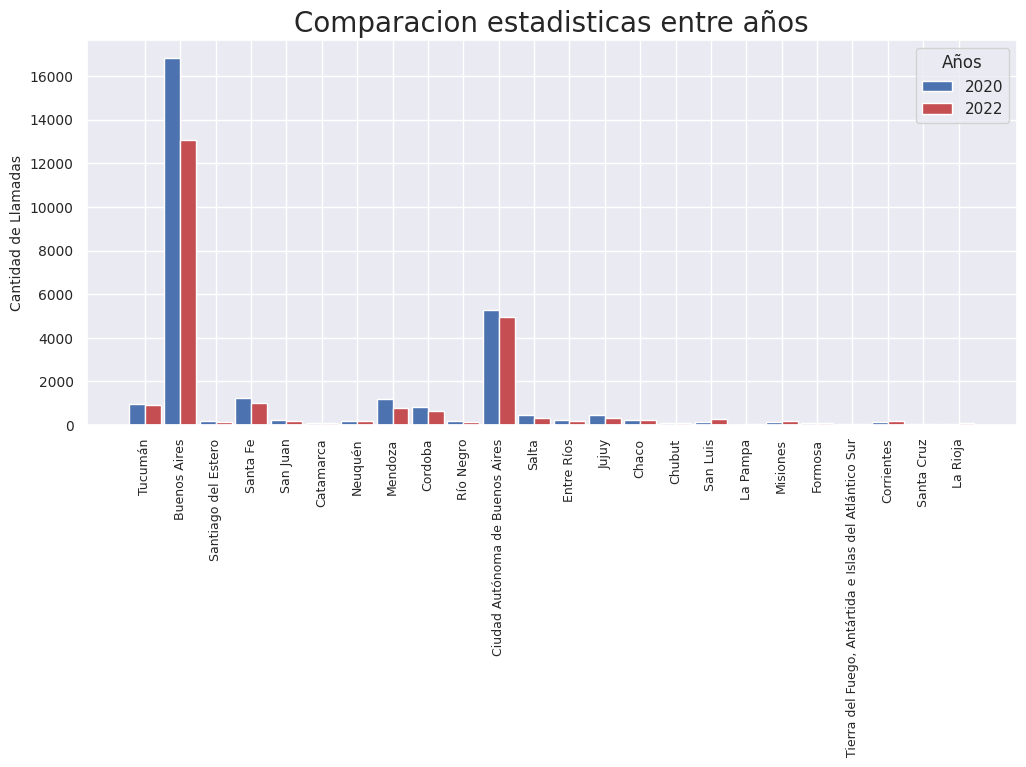

In [ ]:
#Para usar esta librería, vamos a incluir estas líneas de código
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

"""
La clase EstadisticasViolencia se utilizará para mantener información sobre
estadísticas de Situaciones de Violencia en Argentina, para todos los años
que se disponga de datos.
Variables de la clase estadisticasAnuales ( anio: int, cant_llamadas_por_provincia:dict[str,int], promedio_edad_llamantes: int):
Metodo: getAnio, getCantLlamadasPorProvincia, getPromedioEdadLlamantes
"""
# Construimos una clase EstadisticasViolencia que contiene una lista de objetos de la clase EstadisticasAnual
class EstadisticasViolencia:
  def __init__(self, estadisticasAnuales: list[EstadisticasAnual]):
    self._estadisticasAnuales=estadisticasAnuales

  #Metodo de promedios de Edades de las personas que llaman por cada Anio
  def compararPromediosEdadesPorAnio(self):
    edadPromedio = []
    anios = []
    i = 0

    #iteramos sobre la lista self._estadisticasAnuales, y por cada objeto estadisticaAnual obtenemos el anio y el promedio de edad de dicho objeto. Luego imprimimos por pantalla
    for estadisticaAnual in self._estadisticasAnuales:
        anios.append(estadisticaAnual.getAnio())
        edadPromedio.append(estadisticaAnual.getPromedioEdadLlamantes())
        print(f"Promedio de edad de las llamadas del anio {anios[i]}: {edadPromedio[i]}\n")
        i+=1

  # Método para encontrar el año con la menor edad promedio
  def minimaEdadPromedioyAnio(self):
    edadPromedio = []
    anios = []

    #interamos la lista self._estadisticasAnuales, y obtenemos el anio y el promedio de edad
    for estadisticaAnual in self._estadisticasAnuales:
        anios.append(estadisticaAnual.getAnio())
        edadPromedio.append(estadisticaAnual.getPromedioEdadLlamantes())

    # Obtenemos el minimo de la edad
    minimo = min(edadPromedio)

    #obtenemos el Indice donde se encuentra ESA edad dentro de la lista que creamos y asi obtenemos el anio en el que se encuentra la edad minima
    indice_minimo = edadPromedio.index(minimo)
    anio_minimo = anios[indice_minimo]

    print(f"El anio con el promedio de edad de llamadas más bajo es {anio_minimo} con {minimo} años")


  # Método para comparar gráficamente dos años específicos
  def compararGraficamenteDosAnios(self,titulo, etiqueta_x, etiqueta_y, anio1:int, anio2:int):

     #iteramos la lista self._estadisticasAnuales, obtenemos el anio del objeto y comparamos los anios ingresados por el usuario, si coinciden, se crea un dic (dic_anio1,dic_anio2) llamando a la funcion getCantLlamadasPorProvincia()
     for estadisticaAnual in self._estadisticasAnuales:
        anio = estadisticaAnual.getAnio()
        if anio == anio1:
            dic_anio1 = estadisticaAnual.getCantLlamadasPorProvincia()
        elif anio == anio2:
            dic_anio2 = estadisticaAnual.getCantLlamadasPorProvincia()

     # Obtenemos la lista de los nombres provincias de uno de los diccionarios ya que tienen las mismas provincias
     provincias = list(dic_anio1.keys())

     # Reorganizamos los valores según la lista creada anteriormente
     valores_anio1 = [dic_anio1[provincia] for provincia in provincias]
     valores_anio2 = [dic_anio2[provincia] for provincia in provincias]

     ancho_barras=0.45

     #Obtenemos el numero de datos en el eje x
     x = range(len(dic_anio1))

     plt.figure(titulo,figsize = (12,5)) #dimensiones de la figura
     plt.xticks(ticks=x, labels=provincias, rotation = 90, fontsize=9); #pasamos los nombres de las provincias como las etiquetas del eje x, rotacion y tamaño de las etiquetas del eje x
     plt.yticks(fontsize=10); #tamaño de las etiquetas del eje y
     plt.ylabel(etiqueta_y,fontsize=10) #nombre del eje y
     plt.title(titulo,fontsize=20) #titulo del gráfico y tamaño de la fuente

     #A continuacion se utiliza un bucle for para separar columnas en el eje x entre anio1 y anio2, se agregan los valores de cada dic, el ancho de las barras, el numero del anio y un color para identificarlas
     plt.bar([p - ancho_barras / 2 for p in x], valores_anio1, width=ancho_barras, label=f'{anio1}', color='b')
     plt.bar([p + ancho_barras / 2 for p in x], valores_anio2, width=ancho_barras, label=f'{anio2}', color='r')
     plt.legend(title="Años")

  #Metodo que imprime al objeto EstadisticasViolencia
  def __str__(self):
    result = ""
    for estadisticaAnual in self._estadisticasAnuales:
        result += str(estadisticaAnual) + "\n"

    return result



estadisticasViolencia = EstadisticasViolencia(lista_estadisticas_anuales) # Creamos un objeto de la clase EstadisticasViolencia que contiene la lista con objetos de la clase estadisticaAnual

estadisticasViolencia.compararPromediosEdadesPorAnio() # Llamamos al método para comparar el promedio de edades por año

estadisticasViolencia.minimaEdadPromedioyAnio() # Llamamos al método para encontrar el año con la menor edad promedio

#le preguntamos dos anios a comprar al usuario
anio1 = int(input("Ingrese primer año que desea comparar \n 2020 \n 2021 \n 2022 \n"))
anio2 = int(input("Ingrese segundo año que desea comparar \n 2020 \n 2021 \n 2022 \n"))

estadisticasViolencia.compararGraficamenteDosAnios(f"Comparacion estadisticas entre años","Provincias","Cantidad de Llamadas", anio1,anio2) #generamos una grafica que compara entre dos anios la cant. de llamadas x prov.

print(estadisticasViolencia) # Mostramos en pantalla el objeto estadisticasViolencia


12. Crear un objeto instanciando la clase `EstadisticasViolencia` que contenga los datos de todos los años disponibles.
13. Invocar a cada uno de los métodos de la clase con el objeto creado en el punto anterior. Compare gráficamente dos años de su elección.

El año en el que mayor cantidad de llamadas por violencia fue el 2020 con 29278 llamadas.




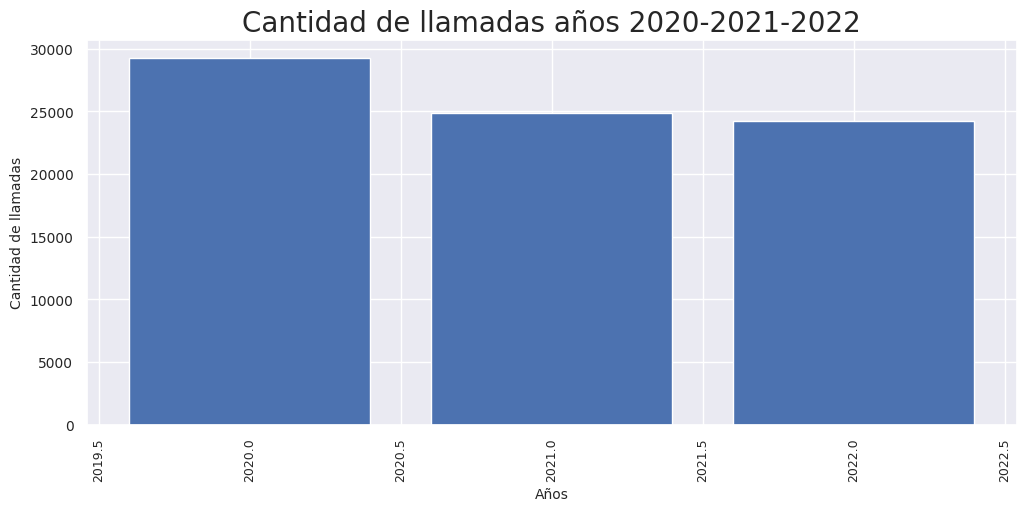

In [ ]:



# Función para calcular la cantidad de llamadas por año
def calcularCantidadLlamadasPorAnio(lista_estadisticas_anuales):

    cant_llamadas_x_anio = {}

    for estadisticaAnual in lista_estadisticas_anuales:
        anio = int(estadisticaAnual.getAnio())
        dic = estadisticaAnual.getCantLlamadasPorProvincia()
        if anio not in cant_llamadas_x_anio:
          cant_llamadas_x_anio[anio] = 0
        for provincia, llamadas in dic.items():
          cant_llamadas_x_anio[anio] += llamadas

    return cant_llamadas_x_anio


# Función para graficar el la cantidad de llamadas por cada año
def graficarCantidadLlamadasXanio(cant_llamadas_por_anio):
    anios = list(cant_llamadas_por_anio.keys())
    total_llamadas = list(cant_llamadas_por_anio.values())

    #obteniendo anio con mayor cantidad de llamadas
    maximo_cant_llamadas = max(total_llamadas)
    indice_maximo_valor = total_llamadas.index(maximo_cant_llamadas)
    anioMayorCantLlamadas = anios[indice_maximo_valor]

    print (f"El año en el que mayor cantidad de llamadas por violencia fue el {anioMayorCantLlamadas} con {maximo_cant_llamadas} llamadas.")
    print ("\n")

    plt.figure(figsize=(12, 5)) #dimensiones de la figura
    plt.xticks(rotation=90, fontsize=9) #rotacion y tamanio de las etiquetas del eje x
    plt.yticks(fontsize=10) #tamaño de las etiquetas del eje y
    plt.xlabel('Años', fontsize=10) #nombre del eje x
    plt.ylabel('Cantidad de llamadas', fontsize=10) #nombre del eje y
    plt.title('Cantidad de llamadas años 2020-2021-2022', fontsize=20) #titulo del gráfico y tamaño de la fuente
    plt.bar(anios, total_llamadas) #pasamos los valores de los ejes x e y, para graficar


cant_llamadas_por_anio = calcularCantidadLlamadasPorAnio(lista_estadisticas_anuales)


graficarCantidadLlamadasXanio(cant_llamadas_por_anio)
